# Introduction
In this  notebook we will explore the Avocado Prices and Volume by various categorical variable namely - Avocado Type, Price Lookup Codes, Region and Year.  
The data is about avocado historical prices (weekly) and sales volume in multiple US markets. The R libraries which we'll be using are **Tidyverse** (mostly **dplyr** for transforming datasets and **ggplot 2** for visualisations) and **data.table** for aggregating data at various levels.
The following notebook is divided into various categories namely - 

## General Visualisation for exploring dataset
<hr>
In the below mentined dataset, data is not transformed but aggregated on various subsets as required. 

1. <a href="#import">Import Libraries and Dataset</a>  
2. <a href="#structure">Structure</a>  
3. <a href="#PriceTrend">Trend of Avocado Prices - <em>BOX PLOT </em> </a>   
4. <a href="#MonthlyPriceTrend">Monthly trend of avocado prices by Avocado type in last four years - <em>LINE PLOT </em></a>  
5. <a href="#RegionPriceTrend">Trend of avocado prices by Avocado type  in last four years by each region - <em>TUFTE BOXPLOT </em></a>  
6. <a href="#RegionMaximumPrice">Maximum avocado price in last four years by each region by type - <em>LOLLIPOP PLOT </em></a>  

## Grouping of Data based on Avocado Codes, total volume and price  
<hr>
<hr>
Advance grouping and reshaping of the dataset is done to come up with answers for below mentioned sections.  

7. <a href="#VariationPriceVolumeCode">Variation in Volume and Net Price by Avocado Codes by month - <em>LINE PLOT </em> </a>  
8. <a href="#VolumePriceVariation">Variation in total volume(total no. of avocado sold) by Avocado Codes (PLUs)  by year - <em>BOX PLOT</em> </a> 

## Specific queries related to datasets, like region with maximum/minimum Volume/Price with trend across the years and related subsets 
<hr>

9. <a href="#topregion">Top Regions by Avocado Codes (PLUs), Avocado Type and year with Total Volume and Net Price - <em>DOT PLOT</em> </a>  
10. <a href="#bottomregion">Bottom Regions by Avocado Codes (PLUs), Avocado Type and year with Total Volume and Net Price - <em>DOT PLOT</em> </a>  


<h3 id="import">Import libraries and read the dataset provided</h3>

In [1]:
library(tidyverse) 
library(knitr)
library(repr)
library(gridExtra)
library(ggthemes)
library(data.table)

avocado = read.csv("../input/avocado.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0.9000     ✔ purrr   0.3.1     
✔ tibble  2.0.1          ✔ dplyr   0.8.0.1   
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



<h3 id="structure">Structure of the dataset</h3>
There are 14 variables with 18,249 observations.

In [2]:
str(avocado)

'data.frame':	18249 obs. of  14 variables:
 $ X           : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Date        : Factor w/ 169 levels "2015-01-04","2015-01-11",..: 52 51 50 49 48 47 46 45 44 43 ...
 $ AveragePrice: num  1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 ...
 $ Total.Volume: num  64237 54877 118220 78992 51040 ...
 $ X4046       : num  1037 674 795 1132 941 ...
 $ X4225       : num  54455 44639 109150 71976 43838 ...
 $ X4770       : num  48.2 58.3 130.5 72.6 75.8 ...
 $ Total.Bags  : num  8697 9506 8145 5811 6184 ...
 $ Small.Bags  : num  8604 9408 8042 5677 5986 ...
 $ Large.Bags  : num  93.2 97.5 103.1 133.8 197.7 ...
 $ XLarge.Bags : num  0 0 0 0 0 0 0 0 0 0 ...
 $ type        : Factor w/ 2 levels "conventional",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year        : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ region      : Factor w/ 54 levels "Albany","Atlanta",..: 1 1 1 1 1 1 1 1 1 1 ...


The data is provided from 2015 till 2018. We 'll convert the year column to factor to treat it as categorical variable and also create a new column called month from Date variable..

In [3]:
#kable(table(avocado$year))
avocado$year = as.factor(avocado$year)
avocado$Date = as.Date(avocado$Date)
avocado$month  = factor(months(avocado$Date), levels = month.name)

<h3 id='PriceTrend'>Trend of Avocado Prices </h3>
The first plot, we will make is the trend of avocado prices in last your years by avocado type.
**Note:**  There are two types of avocado provided namely, Conventional and Organic.

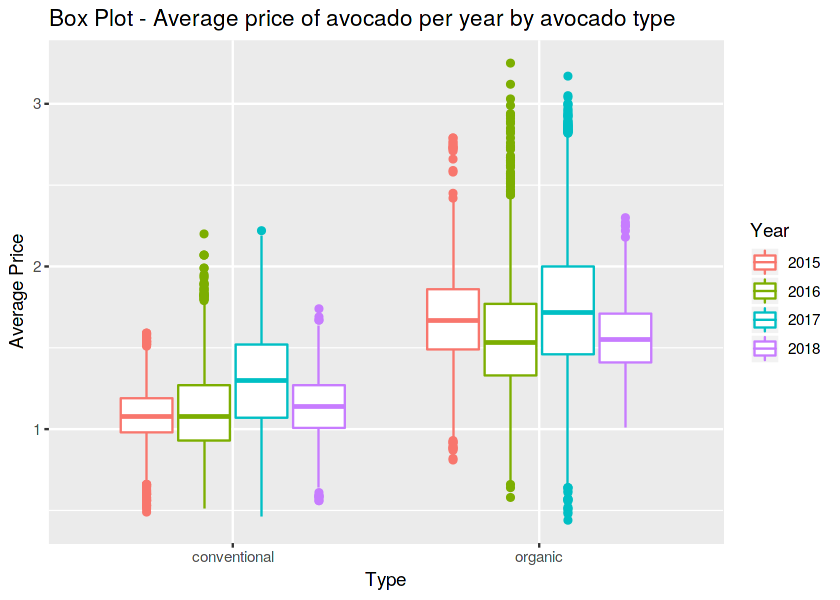

In [4]:
options(repr.plot.width= 7, repr.plot.height=5)
ggplot(avocado, aes(avocado$type, avocado$AveragePrice))+
    geom_boxplot(aes(colour = avocado$year))+
    labs(colour = "Year", x = "Type", y ="Average Price", title = "Box Plot - Average price of avocado per year by avocado type")

<h3 id='MonthlyPriceTrend'>Monthly trend of avocado prices by Avocado type in last four years</h3>
<b>Step 1:</b> We will group the dataset by Year, Month and Avocado type , and then calculate the monthly average price for Avocado respectively for each year.
<hr></hr>
<b>Note:</b> For year 2018, we have data only till March.

In [5]:
grouped = avocado %>% 
    group_by(year, month, type) %>% 
    select(year, month, type,AveragePrice) %>%
    summarise(averagePrice = mean(AveragePrice))

**Step 2:** We wil plot a line chart showing the trend for both Conventional and Organic Avocado.

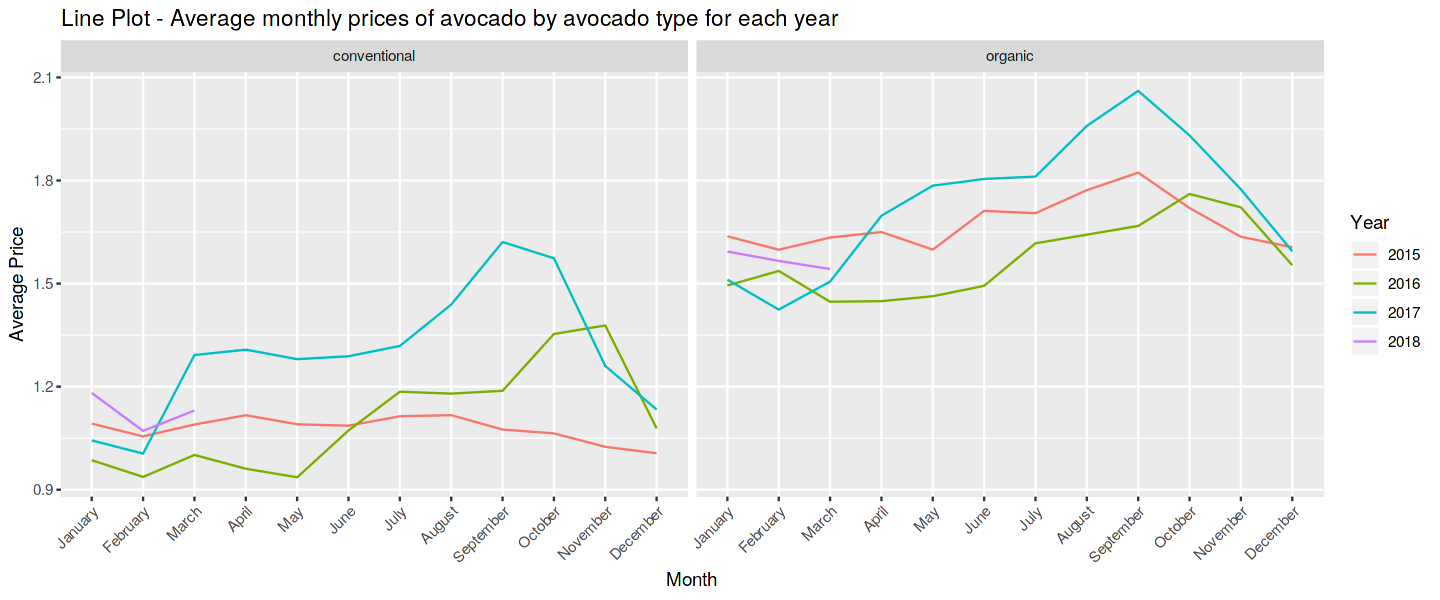

In [6]:
options(repr.plot.width= 12, repr.plot.height=5)
ggplot(data=grouped,aes(x=month, y=averagePrice, colour=year,group = year)) +
    labs(colour = "Year", x = "Month", y ="Average Price", title = "Line Plot - Average monthly prices of avocado by avocado type for each year")+
    geom_line() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    facet_grid(. ~grouped$type) 

<h3 id='RegionPriceTrend'>Trend of avocado prices by Avocado type  in last four years by each region</h3>
We will repeat the above steps but will now group by region instead of month.

In [7]:
grouped_region_conv = avocado %>% 
  select(year, region, type, AveragePrice) %>%
  filter(type == 'conventional')
min_con = round(min(grouped_region_conv$AveragePrice),1)-0.1
max_con = round(max(grouped_region_conv$AveragePrice),1)+0.1

grouped_region_org = avocado %>% 
  select(year, region, type, AveragePrice) %>%
  filter(type == 'organic')

min_org = round(min(grouped_region_org$AveragePrice),1)-0.1
max_org = round(max(grouped_region_org$AveragePrice),1)+0.1

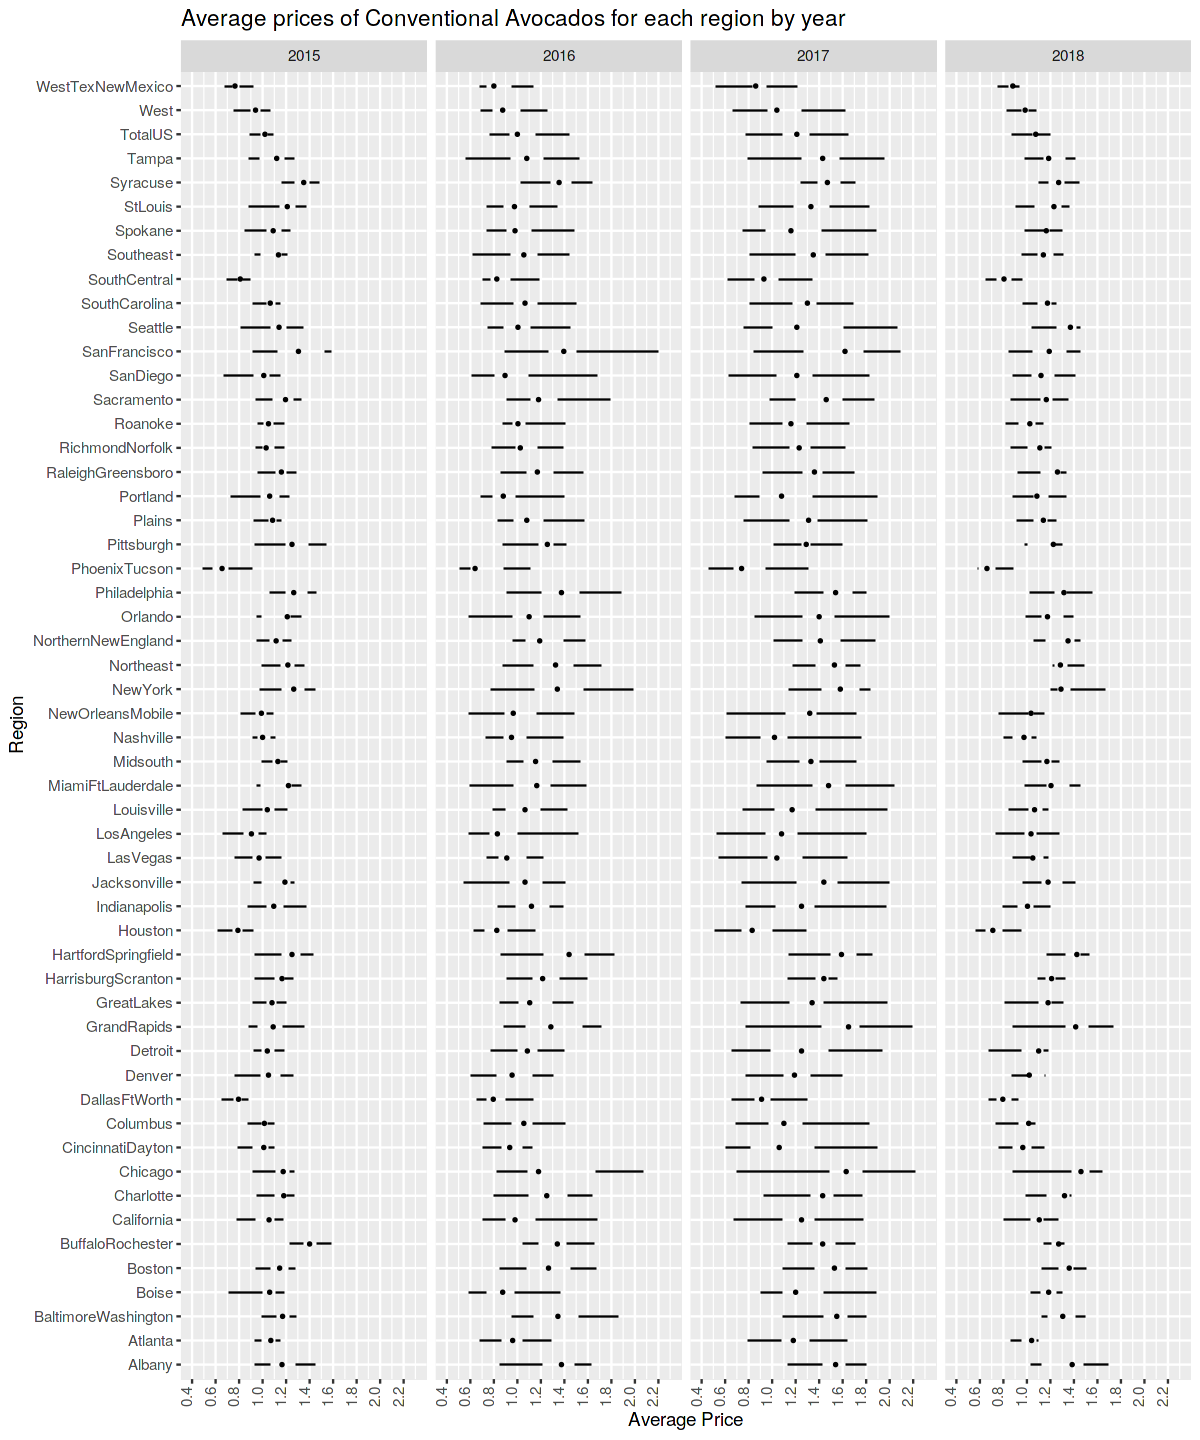

In [8]:
options(repr.plot.width= 10, repr.plot.height=12)
ggplot(grouped_region_conv, aes(x=region, y=AveragePrice)) +
geom_tufteboxplot() + 
    facet_grid(.~grouped_region_conv$year, scales="free") +
  labs(colour = "Year", x = "Region", y ="Average Price", title = "Average prices of Conventional Avocados for each region by year")+
  scale_y_continuous(breaks=c(seq(min_con,max_con,0.2)), limits = c(min_con,max_con)) +
  coord_flip() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0)) 
  

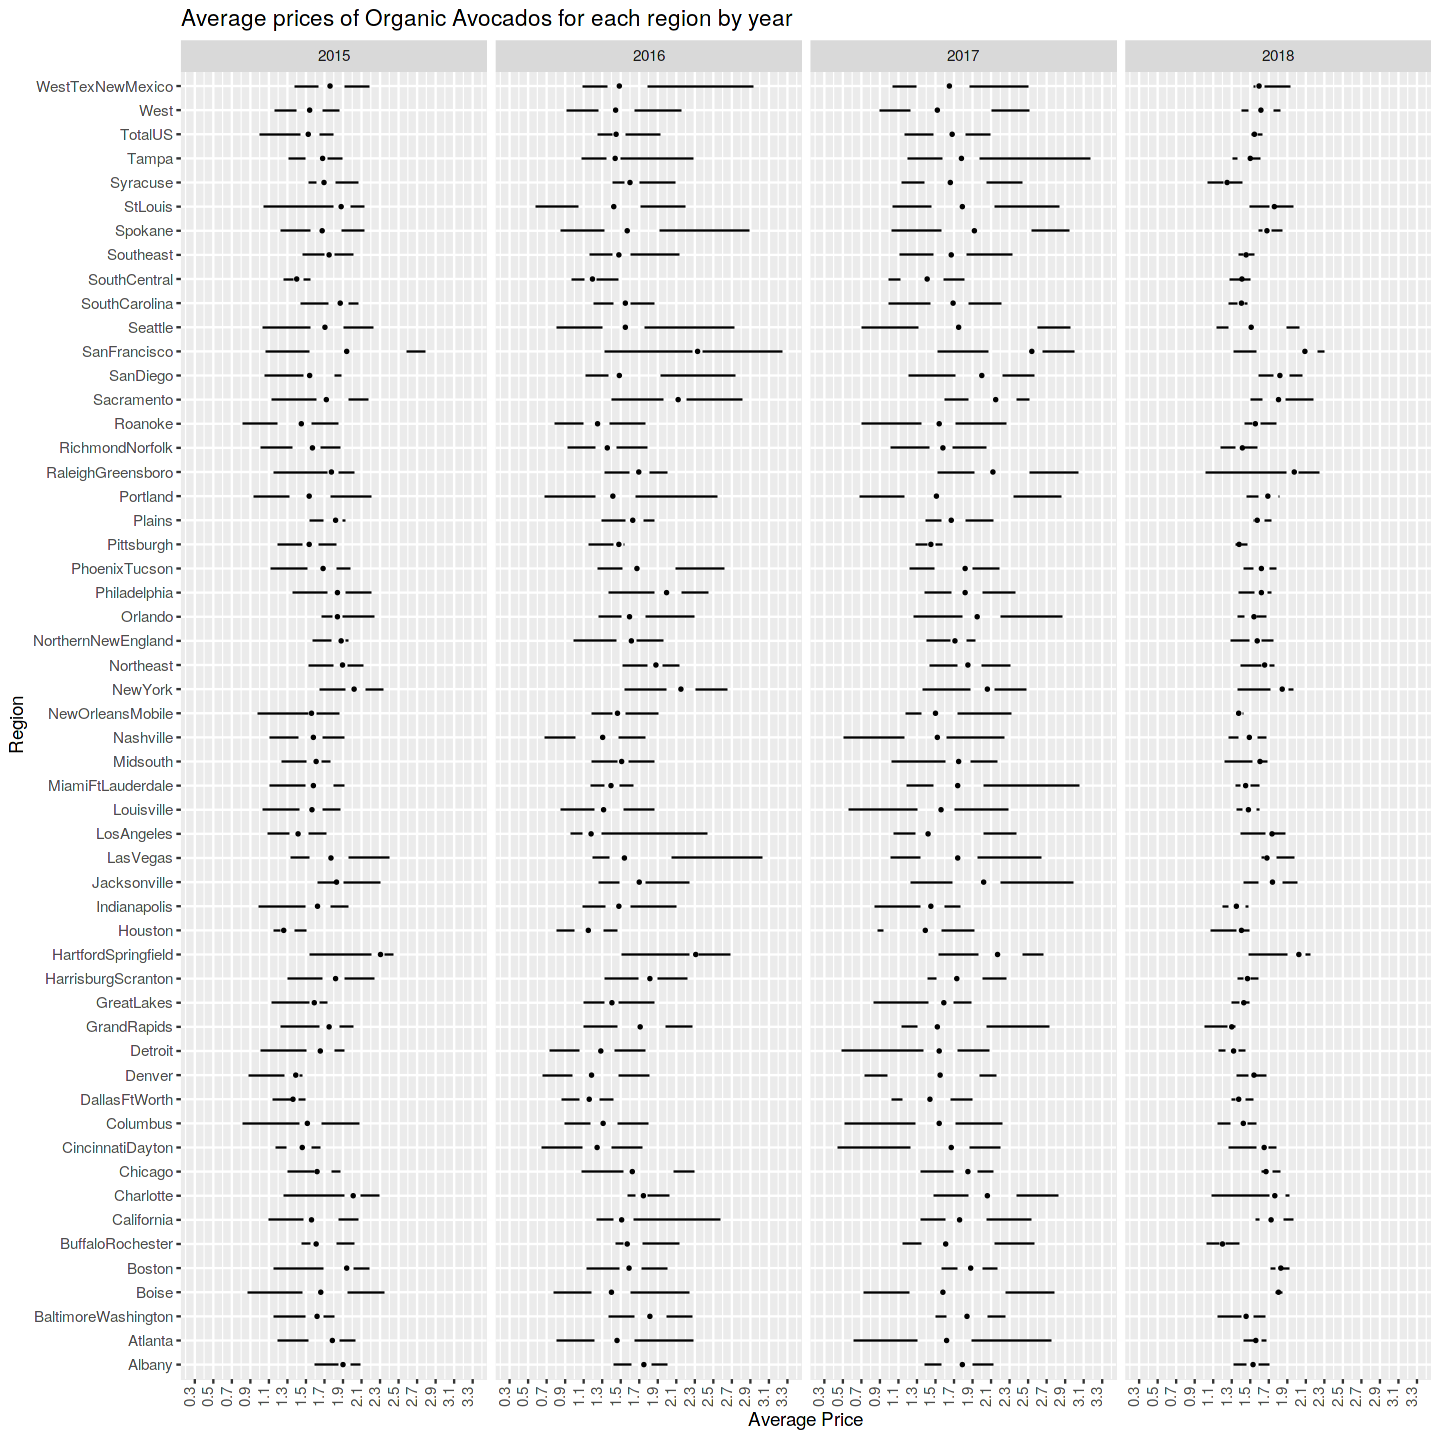

In [9]:
options(repr.plot.width= 12, repr.plot.height=12)
ggplot(grouped_region_org, aes(x=region, y=AveragePrice)) +
geom_tufteboxplot() + 
    facet_grid(.~grouped_region_org$year, scales="free") +
  labs(colour = "Year", x = "Region", y ="Average Price", title = "Average prices of Organic Avocados for each region by year")+
  scale_y_continuous(breaks=c(seq(min_org,max_org,0.2)), limits = c(min_org,max_org)) +
  coord_flip() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0)) 
  

<h3 id='RegionMaximumPrice'>Maximum avocado price in last four years by each region by type </h3>

In [10]:
grouped_region_max_conventional = avocado %>% 
  group_by(region, type) %>% 
  select(region, type,AveragePrice) %>%
  summarise(maxPrice = max(AveragePrice)) %>%
  filter(type =='conventional')
grouped_region_max_conventional$region <- factor(grouped_region_max_conventional$region, levels= pull(arrange(grouped_region_max_conventional,
                                                                                                    (grouped_region_max_conventional$maxPrice)), region))

In [11]:
# grouped_region_max = avocado %>% 
#   select(region, type,AveragePrice) %>%
#   mutate(region = reorder(region,AveragePrice,max))%>%
#   group_by(region) %>%
#   summarise(maxPrice = max(AveragePrice))

grouped_region_max_organic = avocado %>% 
  group_by(region, type) %>% 
  select(region, type,AveragePrice) %>%
  summarise(maxPrice = max(AveragePrice)) %>%
  filter(type =='organic')
grouped_region_max_organic$region <- factor(grouped_region_max_organic$region, levels= pull(arrange(grouped_region_max_organic,
                                                                                                    (grouped_region_max_organic$maxPrice)), region))

# plot1 <- ggplot(grouped_region_max, aes(x=maxPrice, y=region, label = round(maxPrice, 1)))+
#    geom_segment(aes(x = 0, y = region, xend = maxPrice, yend = region), color = "grey50") +
#    geom_point()  +
#    labs(x = "Region", y ="Average Price", title = "Max. prices of avocado")+
#    geom_text(nudge_x = 0.3)


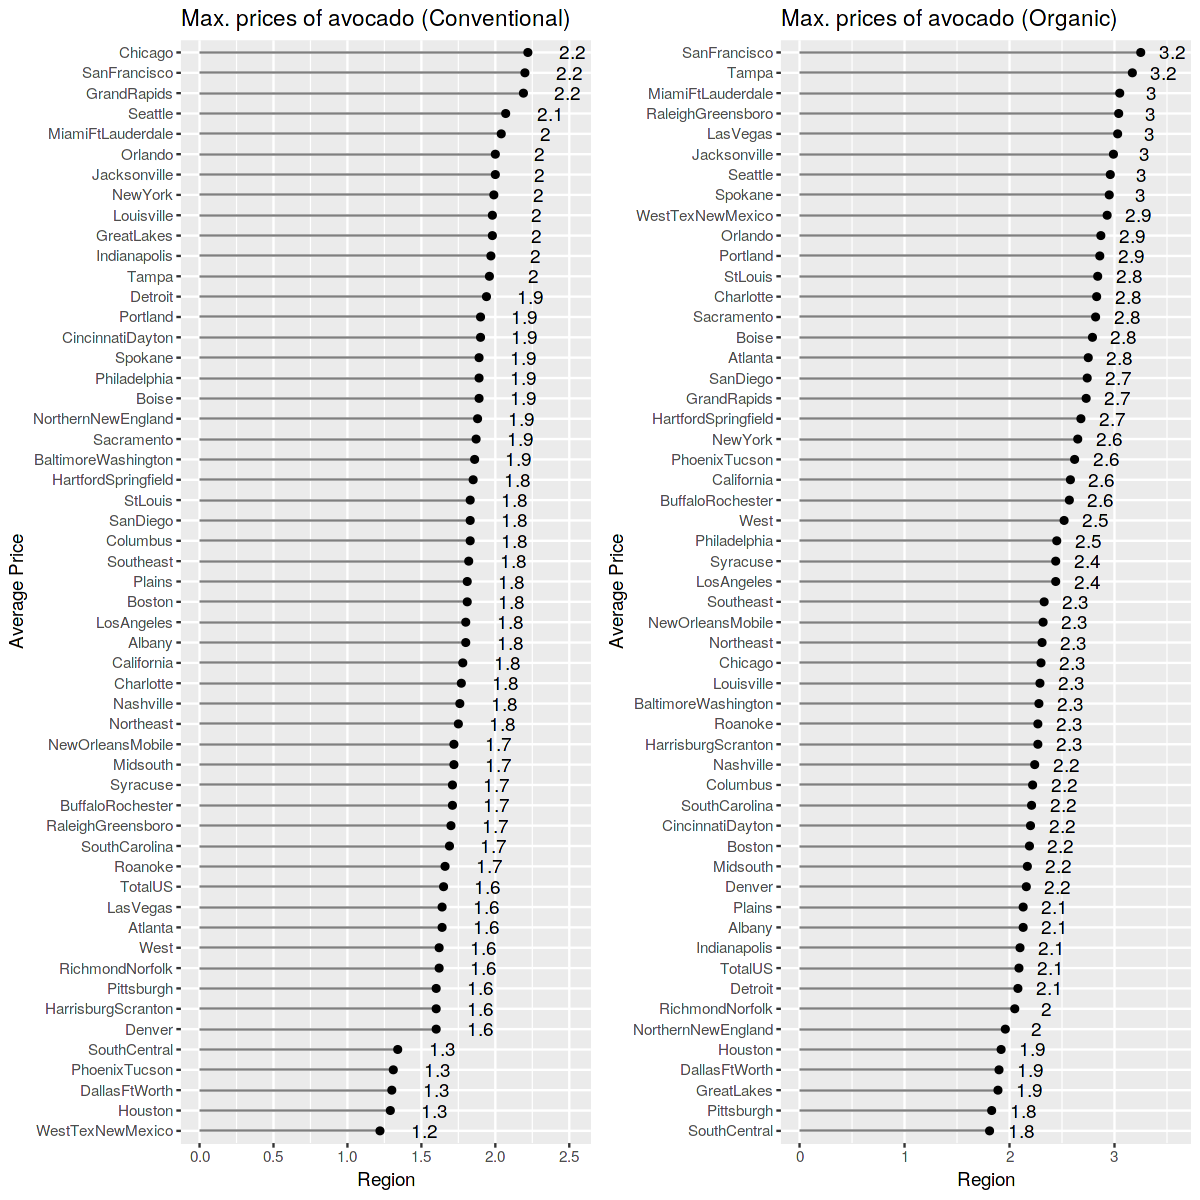

In [12]:
plot2 <- ggplot(grouped_region_max_organic, aes(x=maxPrice, y=region, label = round(maxPrice, 1)))+
 geom_segment(aes(x = 0, y = region, xend = maxPrice, yend = region), color = "grey50")+
  geom_point()  +
labs(x = "Region", y ="Average Price", title = "Max. prices of avocado (Organic)")+
  geom_text(nudge_x = 0.3)

plot3 <- ggplot(grouped_region_max_conventional, aes(x=maxPrice, y=region, label = round(maxPrice, 1)))+
 geom_segment(aes(x = 0, y = region, xend = maxPrice, yend = region), color = "grey50")+
labs(x = "Region", y ="Average Price", title = "Max. prices of avocado (Conventional)")+
  geom_point()  +
  geom_text(nudge_x = 0.3)

options(repr.plot.width= 10, repr.plot.height=10)
grid.arrange(plot3,plot2, ncol=2)

In [13]:
#options(repr.plot.width= 9, repr.plot.height=10)
#grouped_region_max = avocado %>% 
#  group_by(region, type) %>% 
#  select(region, type,AveragePrice) %>%
#  summarise(maxPrice = max(AveragePrice))

#ggplot(grouped_region_max, aes(x=maxPrice, y=region, label = round(maxPrice, 1)))+
#    geom_segment(aes(x = 0, y = region, xend = maxPrice, yend = region), color = "grey50") +
#    geom_point()  +
#    labs(x = "Region", y ="Average Price", title = "Lollipop Plot - Maximum prices of avocado by avocado type for each region")+
#    geom_text(nudge_x = 0.3)+  
#    facet_grid(. ~grouped_region_max$type)

## Types of Avocados - based on Avocado Price Lookup Codes

<h3> Grouping Avocados based on Avocado Price lookup codes (PLU)</h3>  
Also, calculating a new column called Total Price which equals to Average Price x Volume
 <hr>
  
<b>Note:</b>  
Price lookup codes are - Small Hass, Large Hass, Extra large Hass <em>(X4046, X4225, X4770)</em>  
New Price lookup code is created named Others which is equal to  - Total Volume -  Small Hass- Large Hass- Extra large Hass <em>(Total Volume - X4046-X4225-X4770)</em>


In [14]:
avocadoCodes = avocado %>%
  mutate(Others = Total.Volume-X4046-X4225-X4770) %>%
  gather("Avocado Type", "Volume", c(X4046:X4770,Others)) %>%
  select (-c(Total.Volume,Total.Bags,Small.Bags,Large.Bags,XLarge.Bags))

avocadoCodes$TotalPrice = avocadoCodes$AveragePrice*avocadoCodes$Volume

## Some visualisation based on Avocado Codes

<h3 id='VariationPriceVolumeCode'>Variation in total volume (total no. of avocado sold) and Net Price (Average Price x Volume) by Avocado Codes (PLUs) by Month</h3>

In [15]:
grouped_avocadoCode = avocadoCodes %>% 
  select(year, month, type, `Avocado Type`, TotalPrice, Volume) %>%
  group_by(year, month,type, `Avocado Type`) %>%
  summarise(TotalPrice = sum(TotalPrice)/1000000, Volume = sum(Volume)/1000000)

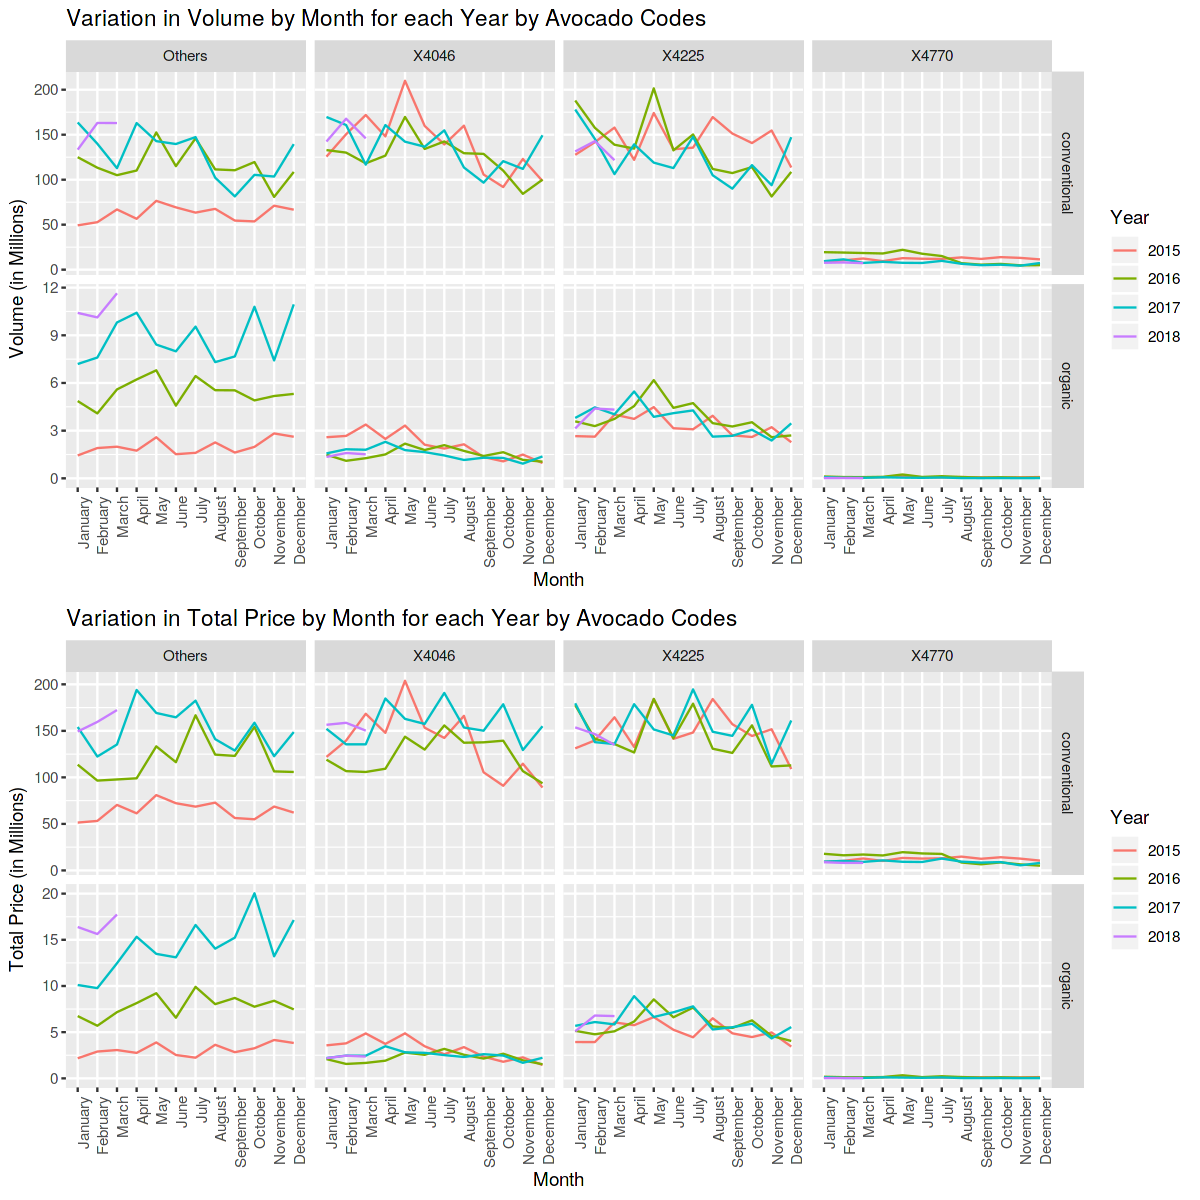

In [16]:
options(repr.plot.width= 10, repr.plot.height=10)
plot1<- ggplot(data=grouped_avocadoCode,
       aes(x=month, y=Volume, colour=year,group = year)) +
  facet_grid(vars(grouped_avocadoCode$type),vars(grouped_avocadoCode$`Avocado Type`), scales="free") +
  geom_line() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(y = "Volume (in Millions)", x ="Month", title = "Variation in Volume by Month for each Year by Avocado Codes", colour = 'Year')


plot2 <- ggplot(data=grouped_avocadoCode,
       aes(x=month, y=TotalPrice, colour=year,group = year)) +
  facet_grid(vars(grouped_avocadoCode$type),vars(grouped_avocadoCode$`Avocado Type`), scales="free") +
  geom_line() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
labs(y = "Total Price (in Millions)", x ="Month", title = "Variation in Total Price by Month for each Year by Avocado Codes", colour = 'Year')

grid.arrange(plot1,plot2, ncol=1)

<h3 id='VolumePriceVariation'>Variation in total volume (total no. of avocado sold) and Net Price (Average Price x Volume) by Avocado Codes (PLUs)  by year</h3>

In [17]:
grouped_avocadoCodes = avocadoCodes %>% 
  select(year,month,type, `Avocado Type`,Volume, TotalPrice, region, AveragePrice) %>%
  group_by(year,month,`Avocado Type`, region, type) %>% 
  summarise(Volume = sum(Volume)/1000000, NetPrice = sum(TotalPrice)/1000000) %>%
  filter(Volume > 0 & NetPrice >0)

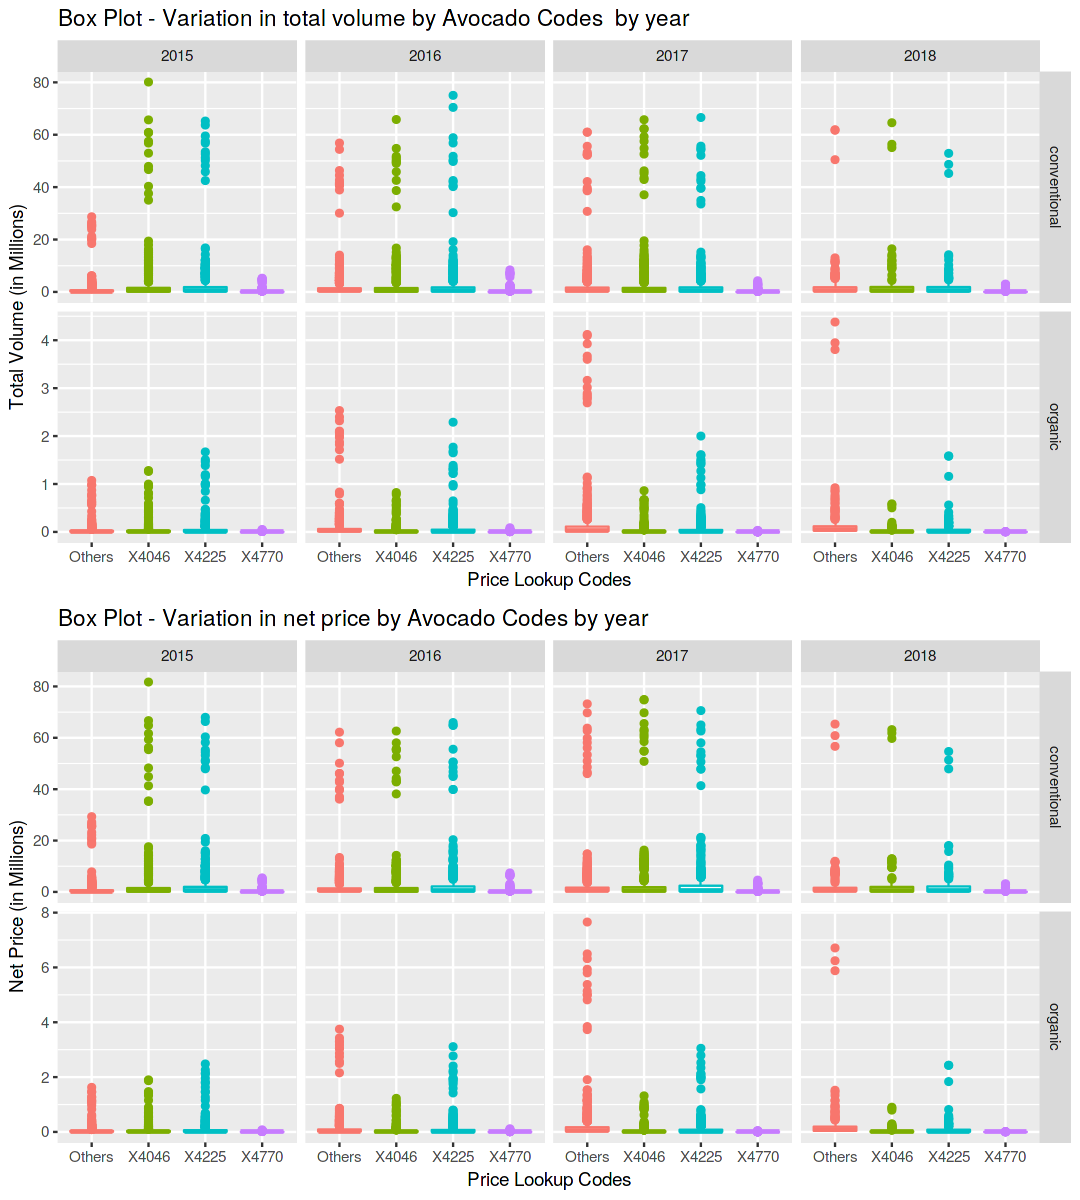

In [18]:
options(repr.plot.width= 9, repr.plot.height=10)

plot1 <- ggplot(grouped_avocadoCodes, aes(grouped_avocadoCodes$`Avocado Type`, grouped_avocadoCodes$Volume))+
  geom_boxplot(aes(colour = grouped_avocadoCodes$`Avocado Type`)) +
  facet_grid(grouped_avocadoCodes$type ~ grouped_avocadoCodes$year , scales="free") +  theme(legend.position="none") +
 labs(y = "Total Volume (in Millions)", x ="Price Lookup Codes", title = "Box Plot - Variation in total volume by Avocado Codes  by year")

plot2 <- ggplot(grouped_avocadoCodes, aes(grouped_avocadoCodes$`Avocado Type`, grouped_avocadoCodes$NetPrice))+
  geom_boxplot(aes(colour = grouped_avocadoCodes$`Avocado Type`)) +
  facet_grid(grouped_avocadoCodes$type ~ grouped_avocadoCodes$year , scales="free") +  theme(legend.position="none")+
labs(y = "Net Price (in Millions)", x ="Price Lookup Codes", title = "Box Plot - Variation in net price by Avocado Codes by year")

grid.arrange(plot1,plot2, ncol=1)

<h3 id='topregion'>Top Regions by Avocado Codes (PLUs), Avocado Type and year with total volume (total no. of avocado sold) and Net Price (Average Price x Volume</h3>

In [19]:
grouped_avocado_type = avocadoCodes %>% 
  select(year,type, `Avocado Type`,Volume, TotalPrice, region, AveragePrice) %>%
  group_by(year,`Avocado Type`, region, type) %>% 
  summarise(Volume = sum(Volume)/1000000, NetPrice = sum(TotalPrice)/1000000) %>%
  filter(Volume > 0  & NetPrice > 0)

avocado_type_DT <- data.table(grouped_avocado_type)

In [20]:
#options(repr.plot.width= 10, repr.plot.height=30)
#plot1 <- ggplot(grouped_avocado_type, aes(x=region, y=Volume))+
#  geom_point(aes(col=year), size=2)  +
#  facet_grid(grouped_avocado_type$type ~grouped_avocado_type$`Avocado Type`, scales="free")+
#  theme(legend.position="none")+
#  labs(title="Volume")+
#  coord_flip()
#plot2 <- ggplot(grouped_avocado_type, aes(x=region, y=NetPrice))+
#  geom_point(aes(col=year), size=2)  +
#  facet_grid(grouped_avocado_type$type ~grouped_avocado_type$`Avocado Type`, scales="free")+
#  labs(title="Net Price")+
#  coord_flip()
#grid.arrange(plot1,plot2, ncol=1)

In [21]:
top5_volume <-  avocado_type_DT[order(-Volume), head(.SD,5),by = .(`Avocado Type`, year, type)]
top5_price <-  avocado_type_DT[order(-NetPrice), head(.SD,5),by = .(`Avocado Type`, year, type)]

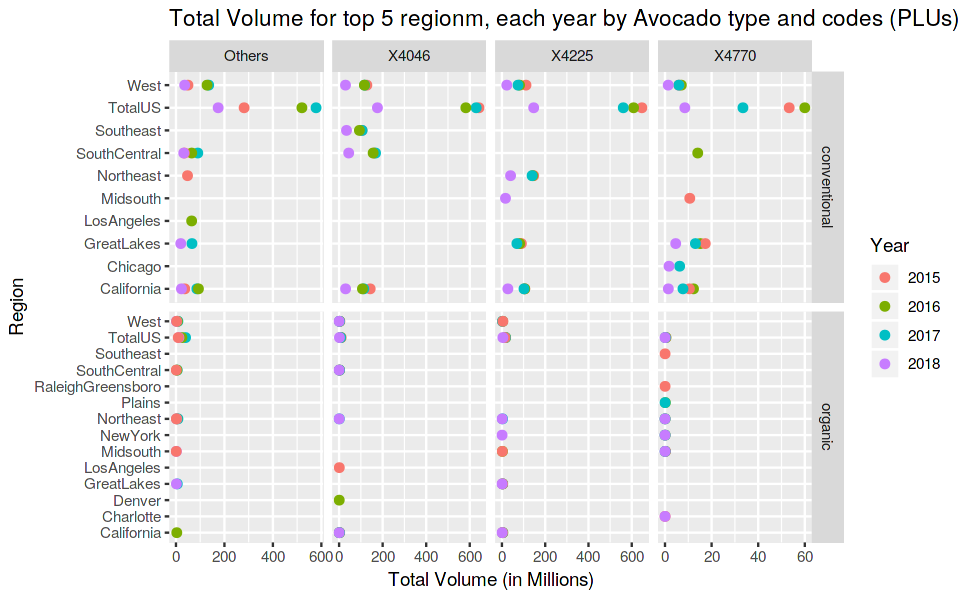

In [22]:
options(repr.plot.width= 8, repr.plot.height=5)

ggplot(top5_volume, aes(x=region, y=Volume))+
    geom_point(aes(col=year), size=2)  +
    facet_grid(top5_volume$type ~top5_volume$`Avocado Type`, scales="free")+
    labs(y = "Total Volume (in Millions)", x ="Region", title = "Total Volume for top 5 regionm, each year by Avocado type and codes (PLUs)", colour = 'Year')+
    coord_flip()

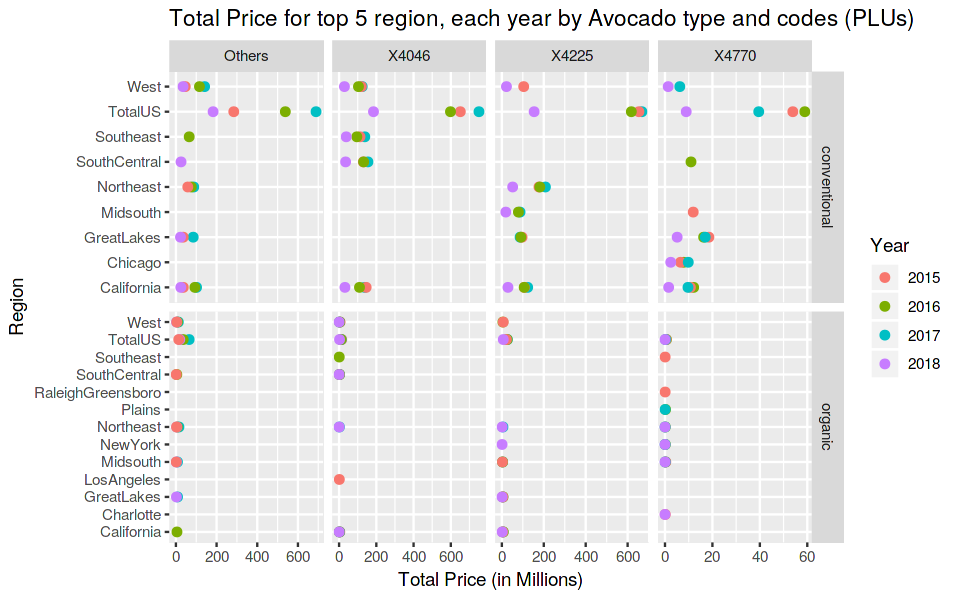

In [23]:
ggplot(top5_price, aes(x=region, y=NetPrice))+
  geom_point(aes(col=year), size=2)  +
  facet_grid(top5_price$type ~top5_price$`Avocado Type`, scales="free")+
    labs(y = "Total Price (in Millions)", x ="Region", title = "Total Price for top 5 region, each year by Avocado type and codes (PLUs)", colour = 'Year')+
  coord_flip()

**Total US** is an exception, and is acting as an Outlier as clearly visible in above two charts. To make beeter visiblity across other regions, let's remove it from the region and the create the charts again.

In [24]:
top5_volume = top5_volume %>% filter(region != 'TotalUS')
top5_price = top5_price %>% filter(region != 'TotalUS')

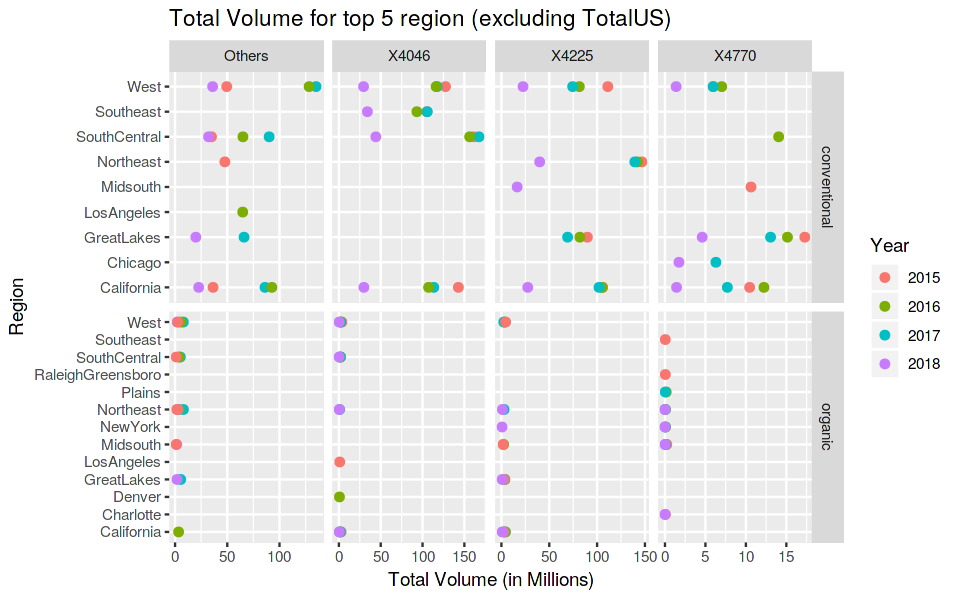

In [25]:
ggplot(top5_volume, aes(x=region, y=Volume))+
    geom_point(aes(col=year), size=2)  +
    facet_grid(top5_volume$type ~top5_volume$`Avocado Type`, scales="free")+
     labs(y = "Total Volume (in Millions)", x ="Region", title = "Total Volume for top 5 region (excluding TotalUS)", colour = 'Year')+
    coord_flip()

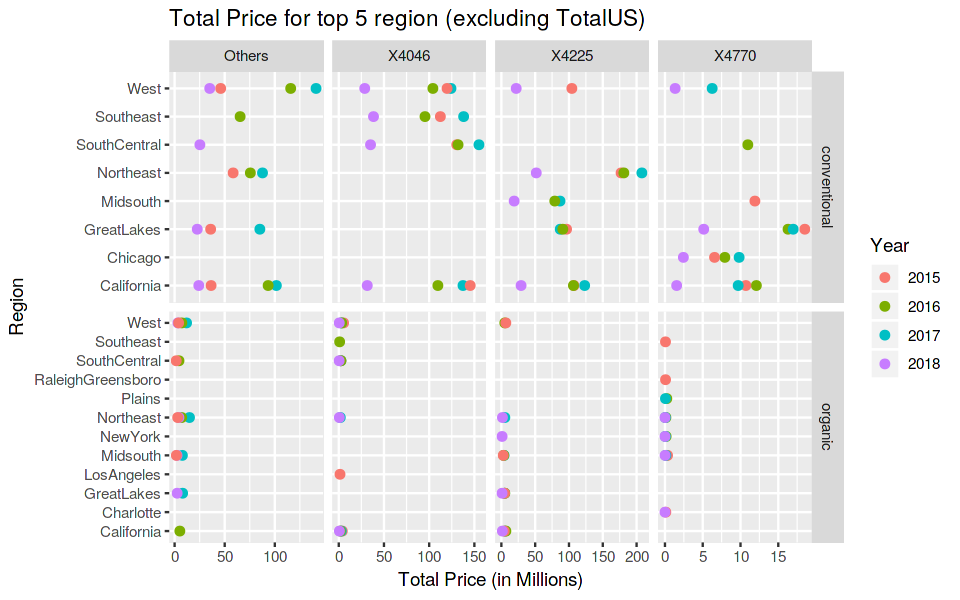

In [26]:
ggplot(top5_price, aes(x=region, y=NetPrice))+
  geom_point(aes(col=year), size=2)  +
  facet_grid(top5_price$type ~top5_price$`Avocado Type`, scales="free")+
   labs(y = "Total Price (in Millions)", x ="Region", title = "Total Price for top 5 region (excluding TotalUS)", colour = 'Year')+
  coord_flip()

<h3 id='bottomregion'>Bottom Regions by Avocado Codes (PLUs), Avocado Type and year with total volume (total no. of avocado sold) and Net Price (Average Price x Volume</h3>

In [27]:
bottom5_volume <-  avocado_type_DT[order(Volume), head(.SD,3),by = .(`Avocado Type`, year, type)]
bottom5_price <-  avocado_type_DT[order(NetPrice), head(.SD,3),by = .(`Avocado Type`, year, type)]

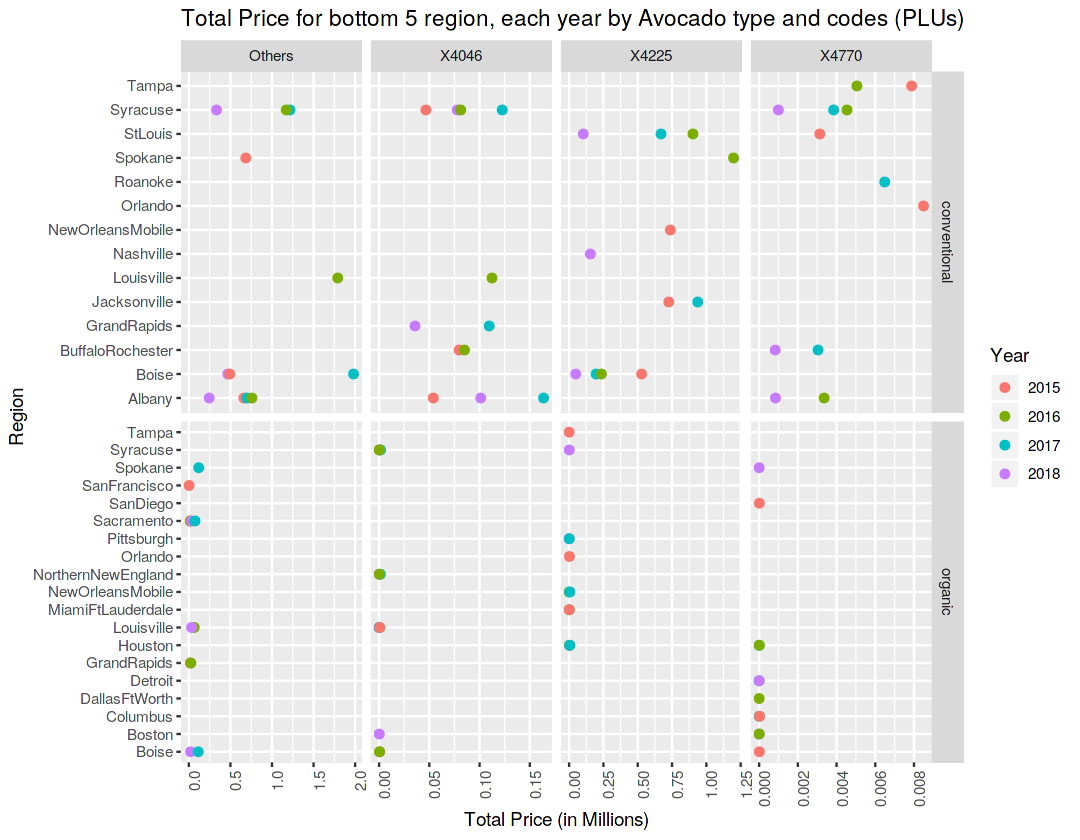

In [28]:
options(repr.plot.width= 9, repr.plot.height=7)
ggplot(bottom5_volume, aes(x=region, y=Volume))+
  geom_point(aes(col=year), size=2)  +
  facet_grid(bottom5_volume$type ~bottom5_volume$`Avocado Type`, scales="free")+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
   labs(y = "Total Price (in Millions)", x ="Region", title = "Total Price for bottom 5 region, each year by Avocado type and codes (PLUs)", colour = 'Year')+
  coord_flip()

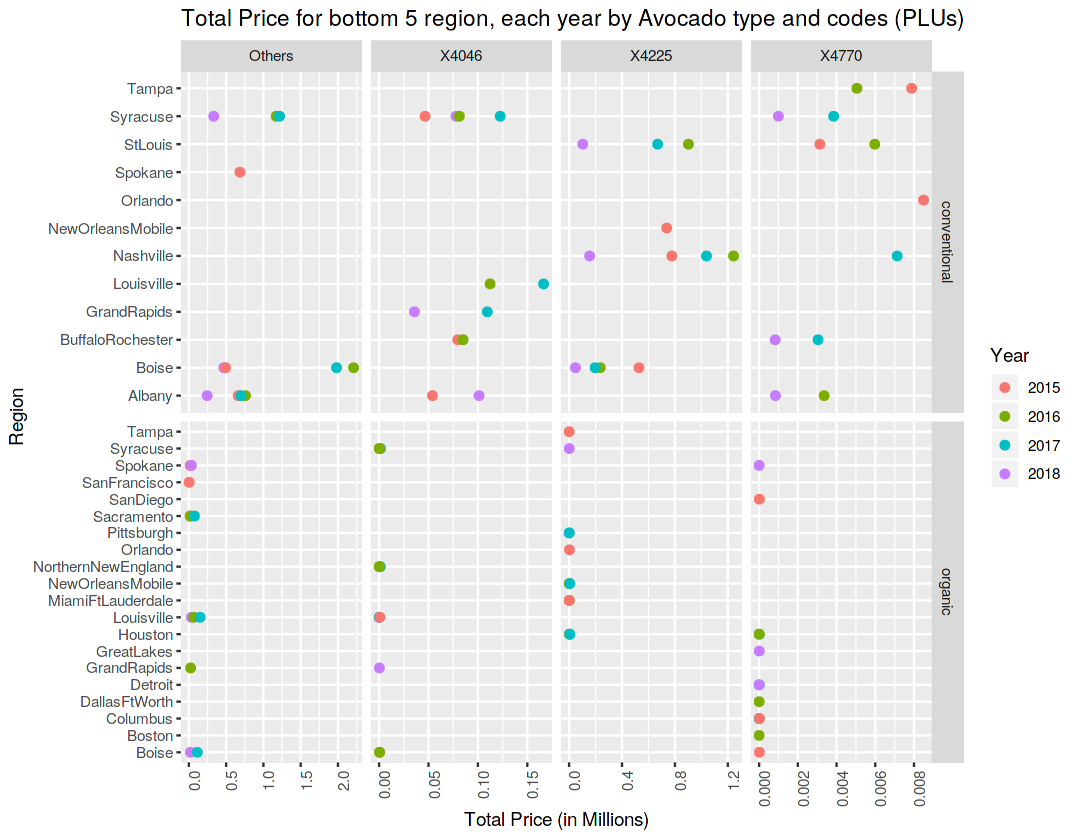

In [29]:
ggplot(bottom5_price, aes(x=region, y=Volume))+
  geom_point(aes(col=year), size=2)  +
  facet_grid(bottom5_price$type ~bottom5_price$`Avocado Type`, scales="free")+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  labs(y = "Total Price (in Millions)", x ="Region", title = "Total Price for bottom 5 region, each year by Avocado type and codes (PLUs)", colour = 'Year')+
  coord_flip()

<h3> Grouping Avocados based on Avocado Bag type.</h3>  
<b>Note:</b> Bag types are Small Bags, Large Bags and Extra Large Bags

In [30]:
avocadoBagType = avocado %>%
  gather("Bag Type", "No. of Bags", c(Small.Bags,Large.Bags,XLarge.Bags)) %>%
  select (-c(Total.Bags,Total.Volume,X4046,X4225,X4770))